Question 1 

Exercises for deliverable from onboarding resources:
For questions 1 and 2, please use test-data.csv. The populations.csv will not be used in this exercise.

1.Write a Python script that creates a data set containing (only) the number of cases of malaria in 6-11 month old males in Zambia, Zimbabwe, Mozambique, and Malawi in 2021.

2. Write a Python script to create a plot comparing the trend in the number of cases of malaria over the years 2000 to 2021 in 6-11 month old males in Zambia, Zimbabwe, Mozambique, and Malawi. Prepare the plot as if it was going to be included in a publication.

3. For question 3, please use populations.csv and draws.csv.

Use the provided data set of "draws" (which are samples, or possible values of the statistic being estimated) to estimate the prevalence of malaria in Zambia, Zimbabwe, Mozambique, and Malawi combined for 6-11 month old males in 2021, including 95% uncertainty intervals.

In [79]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [80]:
test_data =pd.read_csv('test-data.csv')
test_data.head(10)

,age_group_id,age_group_name,sex_id,sex,location_id,location_name,year,cause_name,cause_name_short,measure_id,measure,metric_id,metric,value,lower,upper
0,3,Late Neonatal,1,Male,90,Norway,2000,HIV/AIDS,hiv,5,prevalence,1,Number,0.000922,0.000300,0.002350
1,3,Late Neonatal,1,Male,90,Norway,2001,HIV/AIDS,hiv,5,prevalence,1,Number,0.000959,0.000276,0.002552
2,3,Late Neonatal,1,Male,90,Norway,2002,HIV/AIDS,hiv,5,prevalence,1,Number,0.001159,0.000350,0.003036
3,3,Late Neonatal,1,Male,90,Norway,2003,HIV/AIDS,hiv,5,prevalence,1,Number,0.001370,0.000415,0.003546
4,3,Late Neonatal,1,Male,90,Norway,2004,HIV/AIDS,hiv,5,prevalence,1,Number,0.001563,0.000467,0.004047
5,3,Late Neonatal,1,Male,90,Norway,2005,HIV/AIDS,hiv,5,prevalence,1,Number,0.001747,0.000518,0.004535
6,3,Late Neonatal,1,Male,90,Norway,2006,HIV/AIDS,hiv,5,prevalence,1,Number,0.001921,0.000560,0.004978
7,3,Late Neonatal,1,Male,90,Norway,2007,HIV/AIDS,hiv,5,prevalence,1,Number,0.001936,0.000566,0.004968
8,3,Late Neonatal,1,Male,90,Norway,2008,HIV/AIDS,hiv,5,prevalence,1,Number,0.001850,0.000559,0.004631
9,3,Late Neonatal,1,Male,90,Norway,2009,HIV/AIDS,hiv,5,prevalence,1,Number,0.001848,0.000573,0.004640


In [81]:
test_data.metric.unique()

array(['Number', 'Percent'], dtype=object)

In [82]:
filtered_test_data=test_data[
    (test_data['year']==2021) &
    (test_data['age_group_name']=='6-11 months') &
    (test_data['sex']=='Male')&
    (test_data['metric']=='Number')&
    (test_data['cause_name'] == 'Malaria')&
    (test_data['location_name'].isin(['Zambia', 'Zimbabwe', 'Mozambique', 'Malawi']))

]

In [83]:
filtered_test_data.head()

,age_group_id,age_group_name,sex_id,sex,location_id,location_name,year,cause_name,cause_name_short,measure_id,measure,metric_id,metric,value,lower,upper
11461,389,6-11 months,1,Male,182,Malawi,2021,Malaria,malaria,5,prevalence,1,Number,20882.284352,10536.170111,38948.968448
11549,389,6-11 months,1,Male,184,Mozambique,2021,Malaria,malaria,5,prevalence,1,Number,63252.395193,44321.639535,85631.361877
11637,389,6-11 months,1,Male,191,Zambia,2021,Malaria,malaria,5,prevalence,1,Number,17310.139047,9891.433758,25045.949967
11725,389,6-11 months,1,Male,198,Zimbabwe,2021,Malaria,malaria,5,prevalence,1,Number,1391.363570,1024.114049,1837.691892


Question 2

In [84]:
filtered_test_data_2 =test_data[
    (test_data['year']>=2000) & (test_data['year'] <= 2021) &
    (test_data['age_group_name']=='6-11 months') &
    (test_data['sex']=='Male')&
    (test_data['metric']=='Number')&
    (test_data['cause_name'] == 'Malaria')&
    (test_data['location_name'].isin(['Zambia', 'Zimbabwe', 'Mozambique', 'Malawi']))

]

In [85]:
filtered_test_data_2.head()

,age_group_id,age_group_name,sex_id,sex,location_id,location_name,year,cause_name,cause_name_short,measure_id,measure,metric_id,metric,value,lower,upper
11440,389,6-11 months,1,Male,182,Malawi,2000,Malaria,malaria,5,prevalence,1,Number,42791.822758,36989.940823,49138.138518
11441,389,6-11 months,1,Male,182,Malawi,2001,Malaria,malaria,5,prevalence,1,Number,42585.525956,38170.612610,46843.484493
11442,389,6-11 months,1,Male,182,Malawi,2002,Malaria,malaria,5,prevalence,1,Number,40886.732955,36676.453066,44123.815752
11443,389,6-11 months,1,Male,182,Malawi,2003,Malaria,malaria,5,prevalence,1,Number,38635.350391,35484.200969,41501.031234
11444,389,6-11 months,1,Male,182,Malawi,2004,Malaria,malaria,5,prevalence,1,Number,36854.964794,33312.112020,40644.603649


In [86]:
from matplotlib import pyplot as plt

In [87]:
plt.rcParams['figure.figsize']= (9,5)

plt.rcParams['figure.dpi']= 75

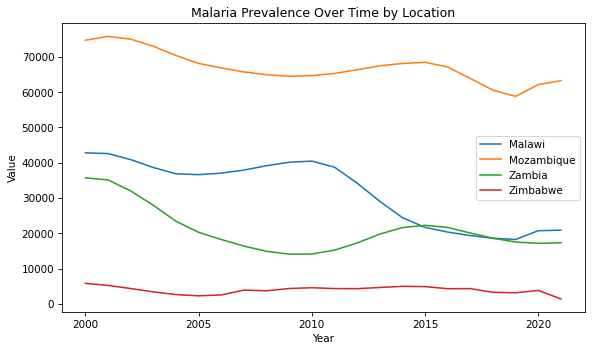

In [88]:
for location, group_data in filtered_test_data_2.groupby('location_name'):
    plt.plot(group_data['year'], group_data['value'], label=location)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Malaria Prevalence Over Time by Location')
plt.legend()
plt.show()

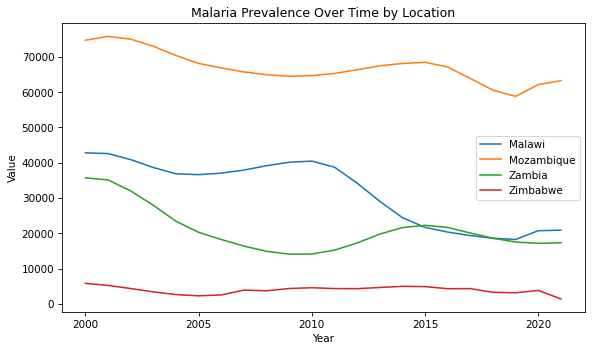

In [89]:
for location in filtered_test_data_2.location_name.unique():
    location_data=filtered_test_data_2.loc[filtered_test_data_2.location_name==location].sort_values('year')
    plt.plot(location_data['year'], location_data['value'], label=location)
    plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Malaria Prevalence Over Time by Location')
plt.legend()
plt.show()

Question 3

In [90]:
populations=pd.read_csv('populations.csv')
populations.head()

,age_group_id,location_id,year_id,sex_id,population,age_group_name,location_name,sex
0,389,182,2021,1,138982.966057,6-11 months,Malawi,Male
1,389,184,2021,1,265132.899466,6-11 months,Mozambique,Male
2,389,191,2021,1,147616.465717,6-11 months,Zambia,Male
3,389,198,2021,1,113226.649954,6-11 months,Zimbabwe,Male


In [91]:
draws=pd.read_csv('draws.csv')
draws.head()

,cause_name,age_group_name,location_name,sex,measure,metric,age_group_id,cause_id,location_id,measure_id,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,Malaria,6-11 months,Malawi,Male,prevalence,Rate,389,345,182,5,...,0.099378,0.175132,0.173503,0.155147,0.224339,0.190134,0.171821,0.213886,0.117966,0.257834
1,Malaria,6-11 months,Zimbabwe,Male,prevalence,Rate,389,345,198,5,...,0.013403,0.010761,0.012553,0.010290,0.015041,0.012877,0.015996,0.012984,0.011453,0.012463
2,Malaria,6-11 months,Mozambique,Male,prevalence,Rate,389,345,184,5,...,0.305916,0.256465,0.269257,0.259690,0.224385,0.267922,0.280841,0.286581,0.194395,0.236844
3,Malaria,6-11 months,Zambia,Male,prevalence,Rate,389,345,191,5,...,0.200535,0.078343,0.090097,0.067008,0.123470,0.116545,0.087272,0.137500,0.098169,0.091510


In [92]:
draws.location_name.unique()

array(['Malawi', 'Zimbabwe', 'Mozambique', 'Zambia'], dtype=object)

In [93]:
combined_data=pd.merge(draws, populations, on=['location_name', 'age_group_id'], how='left')
combined_data.head()

,cause_name,age_group_name_x,location_name,sex_x,measure,metric,age_group_id,cause_id,location_id_x,measure_id,...,draw_96,draw_97,draw_98,draw_99,location_id_y,year_id_y,sex_id_y,population,age_group_name_y,sex_y
0,Malaria,6-11 months,Malawi,Male,prevalence,Rate,389,345,182,5,...,0.171821,0.213886,0.117966,0.257834,182,2021,1,138982.966057,6-11 months,Male
1,Malaria,6-11 months,Zimbabwe,Male,prevalence,Rate,389,345,198,5,...,0.015996,0.012984,0.011453,0.012463,198,2021,1,113226.649954,6-11 months,Male
2,Malaria,6-11 months,Mozambique,Male,prevalence,Rate,389,345,184,5,...,0.280841,0.286581,0.194395,0.236844,184,2021,1,265132.899466,6-11 months,Male
3,Malaria,6-11 months,Zambia,Male,prevalence,Rate,389,345,191,5,...,0.087272,0.137500,0.098169,0.091510,191,2021,1,147616.465717,6-11 months,Male



draws_columns=[col for col in combined_data.columns if col.startswith('draw_')]
combined_data[draws_columns]=combined_data[draws_columns].mul(combined_data.population, axis=0)

combined_data
summed_draws=combined_data[draws_columns].sum()
total_population =combined_data['population'].sum()
overall_prevalence = summed_draws/total_population

In [94]:
draws_columns=[col for col in combined_data.columns if col.startswith('draw')]
draws_columns


['draw_0',
 'draw_1',
 'draw_2',
 'draw_3',
 'draw_4',
 'draw_5',
 'draw_6',
 'draw_7',
 'draw_8',
 'draw_9',
 'draw_10',
 'draw_11',
 'draw_12',
 'draw_13',
 'draw_14',
 'draw_15',
 'draw_16',
 'draw_17',
 'draw_18',
 'draw_19',
 'draw_20',
 'draw_21',
 'draw_22',
 'draw_23',
 'draw_24',
 'draw_25',
 'draw_26',
 'draw_27',
 'draw_28',
 'draw_29',
 'draw_30',
 'draw_31',
 'draw_32',
 'draw_33',
 'draw_34',
 'draw_35',
 'draw_36',
 'draw_37',
 'draw_38',
 'draw_39',
 'draw_40',
 'draw_41',
 'draw_42',
 'draw_43',
 'draw_44',
 'draw_45',
 'draw_46',
 'draw_47',
 'draw_48',
 'draw_49',
 'draw_50',
 'draw_51',
 'draw_52',
 'draw_53',
 'draw_54',
 'draw_55',
 'draw_56',
 'draw_57',
 'draw_58',
 'draw_59',
 'draw_60',
 'draw_61',
 'draw_62',
 'draw_63',
 'draw_64',
 'draw_65',
 'draw_66',
 'draw_67',
 'draw_68',
 'draw_69',
 'draw_70',
 'draw_71',
 'draw_72',
 'draw_73',
 'draw_74',
 'draw_75',
 'draw_76',
 'draw_77',
 'draw_78',
 'draw_79',
 'draw_80',
 'draw_81',
 'draw_82',
 'draw_83',
 '

In [95]:
combined_data[draws_columns]

,draw_0,draw_1,draw_2,draw_3,draw_4,draw_5,draw_6,draw_7,draw_8,draw_9,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,0.138885,0.111267,0.114613,0.204210,0.165019,0.160719,0.113168,0.104924,0.142776,0.128624,...,0.099378,0.175132,0.173503,0.155147,0.224339,0.190134,0.171821,0.213886,0.117966,0.257834
1,0.012096,0.013702,0.011716,0.010032,0.011204,0.009514,0.012602,0.012178,0.012077,0.011924,...,0.013403,0.010761,0.012553,0.010290,0.015041,0.012877,0.015996,0.012984,0.011453,0.012463
2,0.263608,0.170606,0.220489,0.229117,0.341366,0.258631,0.239318,0.221848,0.226517,0.241174,...,0.305916,0.256465,0.269257,0.259690,0.224385,0.267922,0.280841,0.286581,0.194395,0.236844
3,0.110777,0.144958,0.094432,0.113589,0.094076,0.062585,0.119174,0.108115,0.114090,0.141530,...,0.200535,0.078343,0.090097,0.067008,0.123470,0.116545,0.087272,0.137500,0.098169,0.091510


In [96]:
combined_data[draws_columns]=combined_data[draws_columns].mul(combined_data.population, axis=0)
combined_data

,cause_name,age_group_name_x,location_name,sex_x,measure,metric,age_group_id,cause_id,location_id_x,measure_id,...,draw_96,draw_97,draw_98,draw_99,location_id_y,year_id_y,sex_id_y,population,age_group_name_y,sex_y
0,Malaria,6-11 months,Malawi,Male,prevalence,Rate,389,345,182,5,...,23880.153652,29726.557646,16395.307570,35834.491788,182,2021,1,138982.966057,6-11 months,Male
1,Malaria,6-11 months,Zimbabwe,Male,prevalence,Rate,389,345,198,5,...,1811.135003,1470.174451,1296.781486,1411.134416,198,2021,1,113226.649954,6-11 months,Male
2,Malaria,6-11 months,Mozambique,Male,prevalence,Rate,389,345,184,5,...,74460.167424,75981.920301,51540.547152,62795.158681,184,2021,1,265132.899466,6-11 months,Male
3,Malaria,6-11 months,Zambia,Male,prevalence,Rate,389,345,191,5,...,12882.820764,20297.320576,14491.302626,13508.393115,191,2021,1,147616.465717,6-11 months,Male


In [97]:
summed_draws=combined_data[draws_columns].sum()
summed_draws

draw_0     106916.006734
draw_1      83646.982441
draw_2      89654.516820
draw_3     107031.592969
draw_4     128597.969322
               ...      
draw_95    116122.305955
draw_96    113034.276843
draw_97    127475.972975
draw_98     83723.938834
draw_99    113549.177999
Length: 100, dtype: float64

In [98]:
total_population=combined_data.population.sum()
total_population

np.float64(664958.9811930021)

In [99]:
overall_prevalence=summed_draws/total_population
overall_prevalence

draw_0     0.160786
draw_1     0.125793
draw_2     0.134827
draw_3     0.160960
draw_4     0.193392
             ...   
draw_95    0.174631
draw_96    0.169987
draw_97    0.191705
draw_98    0.125908
draw_99    0.170761
Length: 100, dtype: float64

In [101]:
overall_prevalence.describe()

count    100.000000
mean       0.154614
std        0.023353
min        0.106276
25%        0.136052
50%        0.154655
75%        0.169858
max        0.208922
dtype: float64

In [103]:
uncertainty_interval=np.percentile(overall_prevalence,[2.5, 97.5])
uncertainty_interval

array([0.11554926, 0.19796038])